Dataset Used:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html

https://www.kaggle.com/crawford/20-newsgroups

Installing ktrain

In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 62.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 69.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 104.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 48.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

Importing the dataset.

In [ ]:
import ktrain
from ktrain import text
from sklearn.datasets import fetch_20newsgroups

In [ ]:
categories_labels = ['rec.motorcycles', 'alt.atheism', 'comp.graphics', 'sci.med']

In [ ]:
train = fetch_20newsgroups(
    subset = 'train',
    categories = categories_labels,
    shuffle = True,
    random_state = 0
)

In [ ]:
test = fetch_20newsgroups(
    subset = 'test',
    categories = categories_labels,
    shuffle = True,
    random_state = 0
)

In [ ]:
X_train = train.data
y_train = train.target
X_test = test.data
y_test = test.target

Importing the pre-trained model and the transformer.

In [ ]:
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name, maxlen=512, class_names=categories_labels)

In [ ]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)


preprocessing train...
language: en
train sequence lengths:
	mean : 265
	95percentile : 653
	99percentile : 1739


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 284
	95percentile : 754
	99percentile : 2149


Creating the Learner model.

In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
141/141 [==============================] - 141s 946ms/step - loss: 1.1983 - accuracy: 0.4778
Epoch 2/3
141/141 [==============================] - 132s 935ms/step - loss: 0.9578 - accuracy: 0.5510
Epoch 3/3
141/141 [==============================] - 70s 492ms/step - loss: 37.2052 - accuracy: 0.2652


done.
Visually inspect loss plot and select learning rate associated with falling loss


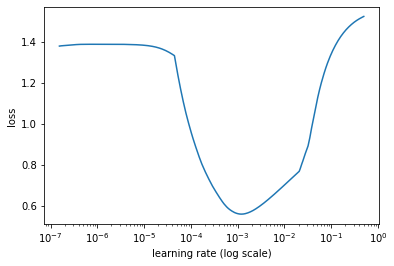

In [ ]:
#Finding the learning rate for the model
learner.lr_find(show_plot=True, max_epochs=3)

In [ ]:
learner.fit_onecycle(1e-5, 3)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/3
141/141 [==============================] - 173s 1s/step - loss: 1.1671 - accuracy: 0.6281 - val_loss: 0.5859 - val_accuracy: 0.9481
Epoch 2/3
141/141 [==============================] - 163s 1s/step - loss: 0.2558 - accuracy: 0.9743 - val_loss: 0.1741 - val_accuracy: 0.9594
Epoch 3/3
141/141 [==============================] - 163s 1s/step - loss: 0.0827 - accuracy: 0.9934 - val_loss: 0.1305 - val_accuracy: 0.9727


In [ ]:
#Printing the performance metrics and confusion matrix
learner.validate(class_names = categories_labels)

47/47 [==============================] - 32s 655ms/step
                 precision    recall  f1-score   support

rec.motorcycles       0.94      0.97      0.96       319
    alt.atheism       0.98      0.97      0.97       389
  comp.graphics       0.98      0.98      0.98       398
        sci.med       0.98      0.97      0.98       396

       accuracy                           0.97      1502
      macro avg       0.97      0.97      0.97      1502
   weighted avg       0.97      0.97      0.97      1502



array([[309,   0,   4,   6],
       [ 10, 376,   2,   1],
       [  4,   2, 390,   2],
       [  4,   6,   0, 386]])

Creating Predictor and predicting the data.

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [ ]:
x = "I have a 42 yr old male friend, misdiagnosed as having osteopporosis for two years, who recently found out that his illness is the rare Gaucher's disease."

In [ ]:
predictor.predict(x)

1/1 [==============================] - 0s 67ms/step


'sci.med'

In [ ]:
predictor.save('model')